# Проект

# Проверка гипотез по увеличению выручки в интернет-магазине —oценить результаты A/B теста  

  


## Описание проекта  
   
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.   


## Описание данных  и задач

### Часть 1. Приоритизация гипотез.   
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  

####  Задача   
Приоритезируйте гипотезы двумя методами и сравните результаты.

### Данные для первой части    
Файл /datasets/hypothesis.csv.   
- Hypothesis — краткое описание гипотезы;  
- Reach — охват пользователей по 10-балльной шкале;  
- Impact — влияние на пользователей по 10-балльной шкале;  
- Confidence — уверенность в гипотезе по 10-балльной шкале;  
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

### Часть 2. Анализ A/B-теста   
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

#### Задачи

**Проанализировать A/B-тест:**
- Построить график кумулятивной выручки по группам.   
- Построить график кумулятивного среднего чека по группам.  
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A.   
- Построить график кумулятивного среднего количества заказов на посетителя по группам.  
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.   
- Построить точечный график количества заказов по пользователям.  
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.  
- Построить точечный график стоимостей заказов.   
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.   
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.   
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.   
- Посчитать  статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.   

**Принять решение по результатам теста и объяснить его.**  

Варианты решений:  
1. Остановить тест, зафиксировать победу одной из групп.  
2. Остановить тест, зафиксировать отсутствие различий между группами.  
3. Продолжить тест.  

### Данные для второй части  

Файл /datasets/orders.csv.    
- transactionId — идентификатор заказа;  
- visitorId — идентификатор пользователя, совершившего заказ;  
- date — дата, когда был совершён заказ;  
- revenue — выручка заказа;  
- group — группа A/B-теста, в которую попал заказ.  

Файл /datasets/visitors.csv.   
- date — дата;  
- group — группа A/B-теста;  
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста  

<a id='step_0'></a><h3>План работ</h3>

[1. Загружаем библиотеки и данные о гипотезах часть 1](#step_1)  
[1.1 Применение фреймворка ICE для приоритизации гипотез](#step_1.1)   
[1.2 Применение фреймворка RICE для приоритизации гипотез](#step_1.2)   
[2. Часть 2. Часть 2. Анализ A/B-теста ](#step_2)  
[2.1 Загружаем данные, предобработка](#step_2.1)  
[2.1.1 Загружаем данные о счетах, предобработка](#step_2.1.1)  
[2.1.2 Загружаем данные о посещениях, предобработка](#step_2.1.2)   
[3 Исследовательский анализ. Построение графиков и определение аномалий](#step_3)    
[3.1 График кумулятивной выручки по группам](#step_3.1)  
[3.2 График кумулятивного среднего чека по группам](#step_3.2)   
[3.3 График относительного изменения кумулятивного среднего чека группы B к группе A](#step_3.3)   
[3.4 График кумулятивного среднего количества заказов на посетителя по группам](#step_3.4)   
[3.5 График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A](#step_3.5)   
[3.6 Точечный график количества заказов по пользователям](#step_3.6)   
[3.7 Определение границы аномального количества заказов на пользователя](#step_3.7)   
[3.8 Точечный график стоимостей заказов](#step_3.8)   
[3.9 Определение границы аномальной стоимости заказов](#step_3.9)   
[4. Статистический анализ](#step_4)      
[4.1. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным](#step_4.1)     
[4.2. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#step_4.2)  
[4.3. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным](#step_4.3)    
[4.4. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#step_4.4)   
[5. Общий вывод, принятие решения](#step_5)      

<a id='step_1'></a><h3>1. Загружаем библиотеки и данные о гипотезах часть 1</h3>

[К плану работ](#step_0)

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
#загружаем даннык из файла hypothesis.csv о 9 гипотезах
data1 = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
#переименовываем колонки для удобства
data1.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [4]:
#выводим таблицу
data1.head(10) 

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<a id='step_1.1'></a><h3>1.1 Применение фреймворка ICE для приоритизации гипотез</h3>

[К плану работ](#step_0)  

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.  

In [5]:
# оптимизируем вывод таблицы на экран
pd.set_option('display.max_colwidth', 0)

In [6]:
# фреймворк ICE для приоритизации гипотез
data1['ICE'] = data1['impact'] * data1['confidence'] / data1['efforts']

In [7]:
# Отсортируем гипотезы по убыванию приоритета и выведем на экран
display(data1[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


<a id='step_1.2'></a><h3>1.2 Применение фреймворка RICE для приоритизации гипотез</h3>

[К плану работ](#step_0)

In [8]:
# фреймворк RICE для приоритизации гипотез
data1['RICE'] = data1['reach'] * data1['impact'] * data1['confidence'] / data1['efforts']
# Отсортируем гипотезы по убыванию приоритета и выведем на экран
display(data1[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Выводы  
Гипотезы 8, 0, 7, 6, 2 - лидируют при методе ICE для приоритизации гипотез.  
При RICE для приоритизации гипотез пятерка лидеров не поменялась, изменился лишь их порядок - 7, 2, 0, 6, 8. 
**Во втором случает добавлен параметр rich - охват аудитории**. Скорее всего **изменение приоритета связано именно с ним**. Форма подписки на основные страницы и рекомендации на сайт - больше выиграют именно из-за широкого охвата аудитории.

<a id='step_2'></a><h3>2. Часть 2. Анализ A/B-теста</h3>

[К плану работ](#step_0)

<a id='step_2.1'></a><h3>2.1 Загружаем данные, предобработка </h3>

[К плану работ](#step_0)

<a id='step_2.1.1'></a><h3>2.1.1 Загружаем данные о счетах, предобработка </h3>

[К плану работ](#step_0)

In [9]:
#загружаем данные о счетах
orders = pd.read_csv('/datasets/orders.csv')
orders.info()
# приводим даты к нужному формату
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders = orders[['visitorId', 'group', 'transactionId', 'revenue', 'date']]# упорядочиваем столбцы таблицы в нужном нам порядке
orders.columns = ['userId', 'group', 'orderId', 'revenue', 'date']# переименовываем столбцы таблицы для удобства
#смотрим верх таблиц
display(orders.head(5))
#смотрим пропуски
display(orders.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,userId,group,orderId,revenue,date
0,3312258926,B,3667963787,1650,2019-08-15
1,3642806036,B,2804400009,730,2019-08-15
2,4069496402,A,2961555356,400,2019-08-15
3,1196621759,B,3797467345,9759,2019-08-15
4,2322279887,B,2282983706,2308,2019-08-15


userId     0
group      0
orderId    0
revenue    0
date       0
dtype: int64

In [10]:
# отберем данные заказов по группам
orders_a = orders.query('group == "A"')
# выведем на экран информацию о таблице заказов группы а
display(orders_a.info())
# группа В
orders_b = orders.query('group == "B"')
# выведем на экран информацию о таблице заказов группы в
display(orders_b.info())
# соберем id пользователей, попавших в обе группы
orders_cross = list(np.intersect1d(orders_a['userId'], orders_b['userId']))
# выведем на экран количество уникальных пользователей во всех заказах
print('количество уникальных пользователей во всех заказах ', len(orders['userId'].unique()))
# посчитаем количество пользователей попавших в обе группы
print('количество уникальных пользователей попавших в обе группы ', len(orders_cross))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 2 to 1195
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   userId   557 non-null    int64         
 1   group    557 non-null    object        
 2   orderId  557 non-null    int64         
 3   revenue  557 non-null    int64         
 4   date     557 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 26.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   userId   640 non-null    int64         
 1   group    640 non-null    object        
 2   orderId  640 non-null    int64         
 3   revenue  640 non-null    int64         
 4   date     640 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 30.0+ KB


None

количество уникальных пользователей во всех заказах  1031
количество уникальных пользователей попавших в обе группы  58


#### Вывод:
58 пользователей попали и в группу А и в группу В одновременно, данные об их покупках могут исказить статистику. Мы исследуем поведение пользователей из 2-х групп. Один и тот же пользователь в разных группах будет транслировать результаты группы А в результаты группы В и наоборот, это испортит чистоту эксперимента. Поэтому избавимся от них. Это удаление неизбежно скажется на дальнейшем исследовании, потому что суммарное количество визитов в день включало и удаленных пользователей в том числе. Неизвестно что более исказит картину исследования удаление дублирующихся пользователей в обоих группах, а это удаление более 180 ордеров или их оставление. Изменить данные в таблице visits мы не в состоянии, придется пользоваться теми что есть.
58 уникальных пользователей из 1031 - это более 5%. 181 ордеров из 1197 - это более 15%. Потерю количества посещений по дням - определить невозможно. 

In [11]:
# удаляем данные 58 пользователей, попавших в orders_cross
orders = orders.query('userId not in @orders_cross')
# выведем на экран информацию о таблице заказов группы а
display(orders_a.info())
# выведем на экран информацию о таблице заказов группы в
display(orders_b.info())
# выведем на экран информацию о таблице заказов
display(orders.info())
# выведем на экран количество уникальных пользователей во всех заказах
print('удаление прошло успешно, осталось уникальных пользователей: ', len(orders['userId'].unique()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 2 to 1195
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   userId   557 non-null    int64         
 1   group    557 non-null    object        
 2   orderId  557 non-null    int64         
 3   revenue  557 non-null    int64         
 4   date     557 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 26.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   userId   640 non-null    int64         
 1   group    640 non-null    object        
 2   orderId  640 non-null    int64         
 3   revenue  640 non-null    int64         
 4   date     640 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 30.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   userId   1016 non-null   int64         
 1   group    1016 non-null   object        
 2   orderId  1016 non-null   int64         
 3   revenue  1016 non-null   int64         
 4   date     1016 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


None

удаление прошло успешно, осталось уникальных пользователей:  973


<a id='step_2.1.2'></a><h3>2.1.2 Загружаем данные о посещениях, предобработка </h3>

[К плану работ](#step_0)

In [12]:
# загружаем данные о посещениях
visitors = pd.read_csv('/datasets/visitors.csv')
# смотрим информацию о таблице посещений
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
# приводим даты к нужному формату
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
#смотрим верх таблиц
display(visitors.head(5))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
# проверим таблицу на явные дубликаты
display(visitors.isna().sum())

date        0
group       0
visitors    0
dtype: int64

In [15]:
# посчитаем количество строк (дат визитов) по группам
print('количество дней наблюдений по группам:')
display(visitors['group'].value_counts())
print('минимальная и максимальная дата наблюдений: ')
display(visitors['date'].min())
display(visitors['date'].max())

количество дней наблюдений по группам:


A    31
B    31
Name: group, dtype: int64

минимальная и максимальная дата наблюдений: 


Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

#### Вывод:
В таблице посещений представлены данные 62-х строк, в каждой группе по 31 строке (дней) - это месяц наблюдений проведения теста. Тест проводился в течении августа 2019 года.

<a id='step_3'></a><h3>3 Исследовательский анализ. Построение графиков и определение аномалий </h3>

[К плану работ](#step_0)

<a id='step_3.1'></a><h3>3.1 График кумулятивной выручки по группам </h3>

[К плану работ](#step_0)

Чтобы построить графики, нужно собрать кумулятивные данные. Создадим датафрейм cumulativeData со столбцами:

date — дата;  
group — группа A/B-теста (A или B);  
orders — кумулятивное количество заказов на указанную дату в указанной группе;  
buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);  
visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.  

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     23      19      142779   719     
1 2019-08-01  B     17      17      59758    713     
2 2019-08-02  A     42      36      234381   1338    
3 2019-08-02  B     40      39      221801   1294    
4 2019-08-03  A     66      60      346854   1845    


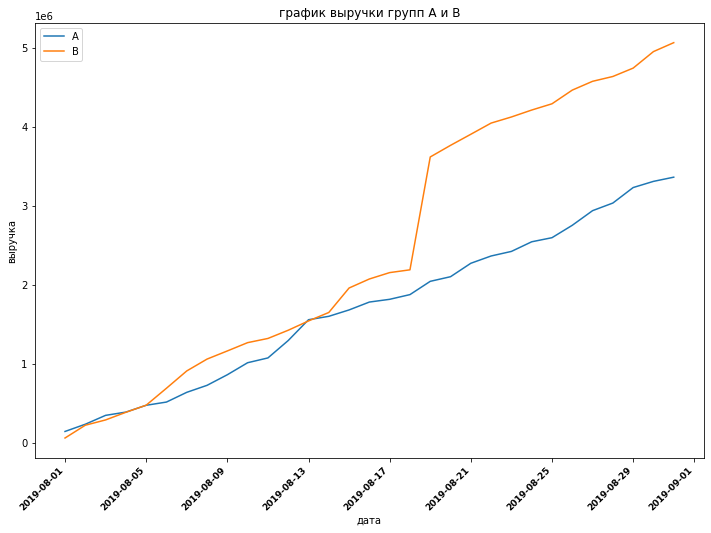

In [16]:
# удаляем явные дубликаты
datesGroups = orders[['date', 'group']].drop_duplicates() 
 #агрегированная таблица заказов до даты и по группам
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
#агрегированная таблица визитов до даты и по группам
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
# объединяем 2 предыдущие таблицы
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
# переименовываем колонки
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
print(cumulativeData.head(5))
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12, 8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
# Add title and axis names
plt.title('график выручки групп А и В')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.xticks(color='black', rotation=45, fontweight='bold', fontsize='9', horizontalalignment='right')

plt.legend() 
plt.show()

#### Выводы  
Выручка группы B в середине эксперимента имеет скачок, скорее всего это связано с крупным заказом, из-за него накопленная выручка стала больше в дальнейшем именно на величину этого заказа. Лидирует группа В с люфтом вверх на дельту аномального заказа.


<a id='step_3.2'></a><h3>3.2 График кумулятивного среднего чека по группам </h3>

[К плану работ](#step_0)

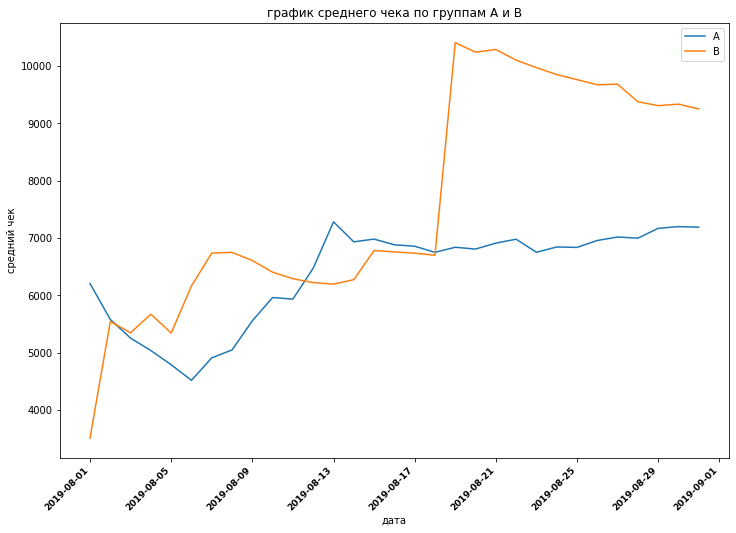

In [17]:
#
plt.figure(figsize=(12, 8))
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.plot(cumulativeRevenueA['date'], (cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']), label='A')
plt.plot(cumulativeRevenueB['date'], (cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']), label='B')
plt.title('график среднего чека по группам А и В')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.xticks(color='black', rotation=45, fontweight='bold', fontsize='9', horizontalalignment='right')

plt.legend() 
plt.show()

#### Выводы  
Средний чек растет в обоих группах. В группе В есть в середине эксперимента резкий скачок среднего чека - скорее всего большой заказ.  
После него у группы В есть тенденция к снижению среднего чека (нивелирование выброса средним чеком намного ниже выброса).   
У группы А есть проседание среднего чека в начале и далее тенденци вверх, могу предположить что интегральная площадь под кривой В покажет больший результат, значит и выручка будет больше. Однако колебания не дают однозначной картины для уверенного завершения эксперимента

<a id='step_3.3'></a><h3>3.3 График относительного изменения кумулятивного среднего чека группы B к группе A </h3>

[К плану работ](#step_0)

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

        date  revenueA  ordersA  revenueB  ordersB
0 2019-08-01  142779    23       59758     17     
1 2019-08-02  234381    42       221801    40     
2 2019-08-03  346854    66       288850    54     
3 2019-08-04  388030    77       385740    68     
4 2019-08-05  474413    99       475648    89     


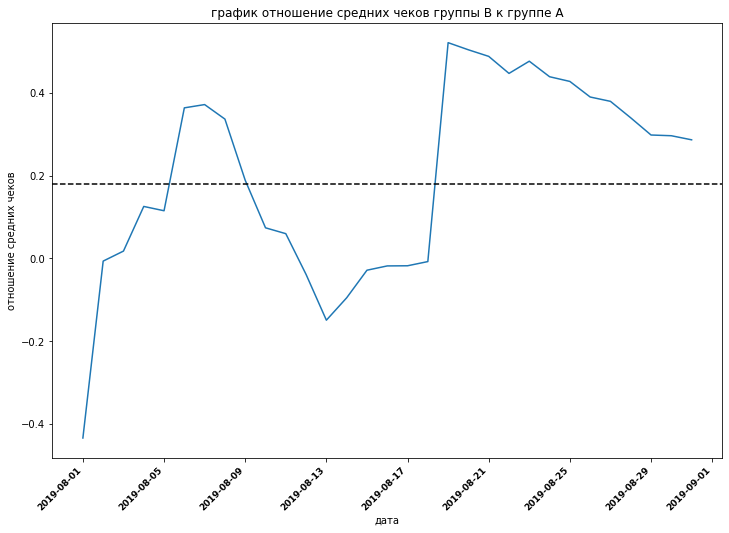

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
print(mergedCumulativeRevenue.head())
# cтроим график: отношение средних чеков
plt.figure(figsize=(12, 8))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']
          /mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


plt.title('график отношение средних чеков группы В к группе А')
plt.xlabel('дата')
plt.ylabel('отношение средних чеков')
plt.xticks(color='black', rotation=45, fontweight='bold', fontsize='9', horizontalalignment='right')
# добавляем уровень средней линии
plt.axhline(y=0.18, color='black', linestyle='--') 
plt.show()

#### Выводы  
Отношение среднего чека группы В к группе А имеет колебательный процесс около линии 0.18 - отношение выручки в группе В то больше чем в А, то меньше. Есть тенденция вверх (средний чек группы В к среднему чеку группы А становится больше), затуханий не наблюдается.

<a id='step_3.4'></a><h3>3.4 График кумулятивного среднего количества заказов на посетителя по группам </h3>

[К плану работ](#step_0)

Построим график кумулятивного среднего количества заказов на посетителя по группам.

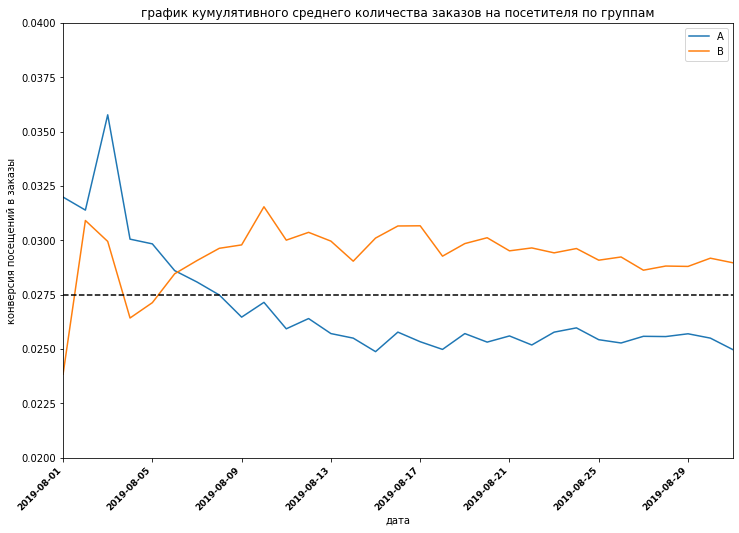

In [19]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12, 8))
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.02, 0.04])
plt.title('график кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('дата')
plt.ylabel('конверсия посещений в заказы')
plt.xticks(color='black', rotation=45, fontweight='bold', fontsize='9', horizontalalignment='right')
# добавляем ось X
plt.axhline(y=0.0275, color='black', linestyle='--') 
plt.show()

#### Выводы  
кумулятивное среднее количество заказов имеет стабилизированный вид в конце эксперимента, причем уровень количества заказов у группы В однозначно выше  на 0.005. Скорее всего группа В получает лучшие результаты продаж по количеству заказов и результат уже не поменяется

<a id='step_3.5'></a><h3>3.5 График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A </h3>

[К плану работ](#step_0)

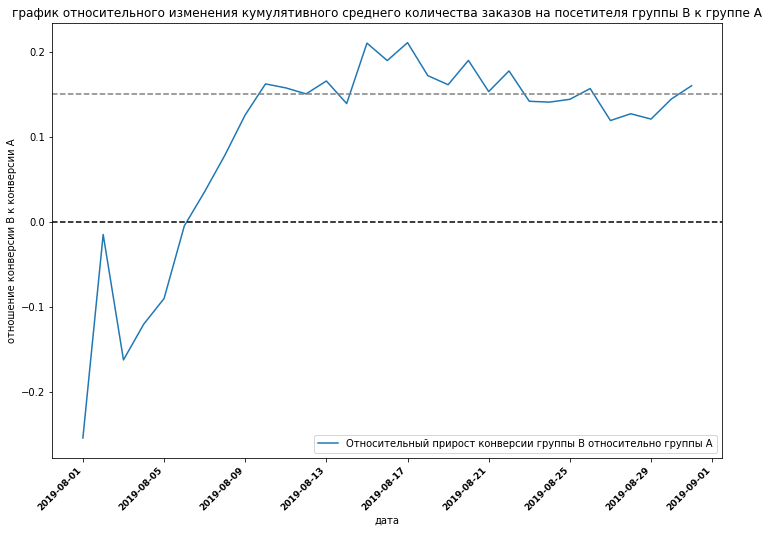

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date',
                                               'conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                    left_on='date', right_on='date', 
                                                                    how='left', suffixes=['A', 'B'])
# cтроим график: изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
plt.figure(figsize=(12, 8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('дата')
plt.ylabel('отношение конверсии В к конверсии А')
plt.xticks(color='black', rotation=45, fontweight='bold', fontsize='9', horizontalalignment='right')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.legend()
plt.show()

#### Выводы  
относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A лишь в начале имело отрицательное значение, это говорит о том что группа В покупала хуже чем А, в дальнейшем ситуация изменилась и группа В стала покупать лучше чем А. Далее идет колебательный тренд в районе 0.15 с затуханием колебаний. Это может свидетельствовать о стабилизации ситуации и группа В покупает лучше чем А

<a id='step_3.6'></a><h3>3.6 Точечный график количества заказов по пользователям </h3>

[К плану работ](#step_0)

Построим точечный график количества заказов по пользователям.

In [21]:
# сгруппируем заказы по пользователям
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})# подсчитаеь число уникальных заказов по сгруппированным данным
)
# переименовываем колонки
ordersByUsers.columns = ['userId', 'orders']
# отсортируем датафрейм по значению в столбце
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

         userId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


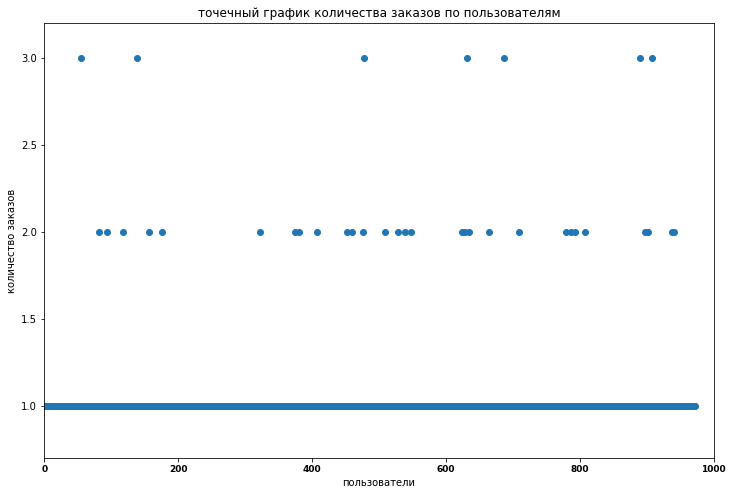

In [22]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(12, 8))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('точечный график количества заказов по пользователям')
plt.xlabel('пользователи')
plt.ylabel('количество заказов')
plt.xticks(color='black', fontweight='bold', fontsize='9')

plt.axis([0, 1000, 0.7, 3.2])
plt.show()

#### Выводы  
График количества по пользователям дает картину максимального числа 1-2-х заказов. Иногда 3-х остальные точки выглядят как выбросы

<a id='step_3.7'></a><h3>3.7 Определение границы аномального количества заказов на пользователя </h3>

[К плану работ](#step_0)

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [23]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
# находим перцентили
print('90% заказов, 95% заказов и 99% заказов соответственно: ', np.percentile(ordersByUsers['orders'], [90, 95, 99]))

         userId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     
90% заказов, 95% заказов и 99% заказов соответственно:  [1. 1. 2.]


#### Выводы  
5% пользователей делают более 2-х заказов, 1% - более 4-х.
Границу установим более 2-х заказов

<a id='step_3.8'></a><h3>3.8 Точечный график стоимостей заказов </h3>

[К плану работ](#step_0)

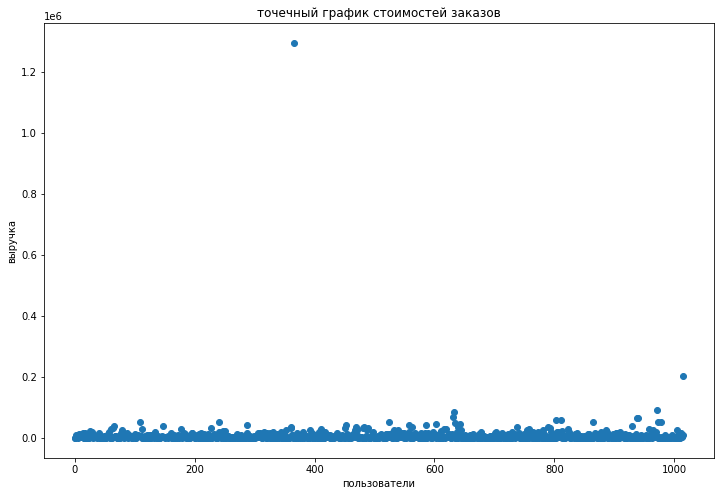

In [24]:
# точечный график стоимостей заказов
plt.figure(figsize=(12, 8))
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('точечный график стоимостей заказов')
plt.xlabel('пользователи')
plt.ylabel('выручка')
plt.show()

<a id='step_3.9'></a><h3>3.9 Определение границы аномальной стоимости заказов </h3>

[К плану работ](#step_0)

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.


In [25]:
# находим перцентили
print('90% стоимости заказов, 95% стоимости заказов и 99% стоимости заказов соответственно: ', np.percentile(orders['revenue'], [90, 95, 99]))

90% стоимости заказов, 95% стоимости заказов и 99% стоимости заказов соответственно:  [17990. 26785. 53904.]


###### Выводы  
5% пользователей делают заказы на сумму 26785, 10% на сумму выше 17990. Аномальными сочтем заказы выше 26785

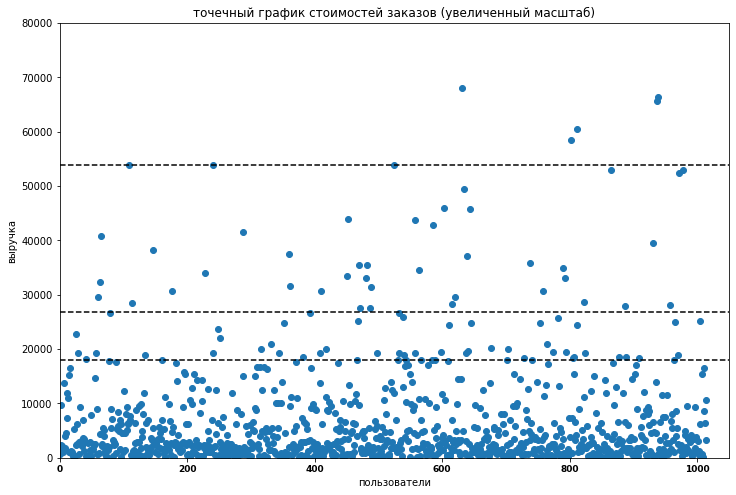

In [26]:
# увеличенный точечный график стоимостей заказов
plt.figure(figsize=(12, 8))
plt.scatter(x_values, orders['revenue'])
plt.title('точечный график стоимостей заказов (увеличенный масштаб)')
plt.xlabel('пользователи')
plt.ylabel('выручка')
plt.xticks(color='black', fontweight='bold', fontsize='9')
plt.axhline(y=53904, color='black', linestyle='--')
plt.axhline(y=17990, color='black', linestyle='--')
plt.axhline(y=26785, color='black', linestyle='--')
plt.axis([0, 1050, 0, 80000])
plt.show()


#### Выводы  
Стоимость заказов не превышает 70000. Выбросов мало - всего 2. Пунктиром добавила горизонтальные линии 90, 95 и 99 перцентилей. График в увеличенном масштабе наглядно демонстрирует правильность выбора границы отсечения стоимости заказов на уровне выше 26785.

<a id='step_4'></a><h3>4. Статистический анализ </h3>

[К плану работ](#step_0)

<a id='step_4.1'></a><h3>4.1. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным </h3>

[К плану работ](#step_0)

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Сформулируем гипотезы. 
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.  
α=5% критический уровень статистической значимости.

In [27]:
# таблица визитов в день для группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
# переименовываем столбцы
visitorsADaily.columns = ['date', 'visitorsPerDateA']
# таблица суммарных куммулятивных визитов на конкретный день для группы А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
# переименовываем столбцы
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# таблица визитов в день для группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
# переименовываем столбцы
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
# таблица суммарных куммулятивных визитов на конкретный день для группы В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
# переименовываем столбцы
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
# таблица заказов в день для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
# переименовываем столбцы
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
# таблица суммарных куммулятивных заказов на конкретный день для группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# таблица заказов в день для группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
# переименовываем столбцы
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
# таблица суммарных куммулятивных заказов на конкретный день для группы В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
# переименовываем столбцы
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# соединяем все таблицы в одну
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
#  Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
# переименовываем столбцы
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
# переименовываем столбцы
ordersByUsersB.columns = ['userId', 'orders']

#в sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. 
#Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. 
#Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее 
#в выборке sampleA методом mean()
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]), ' p-value')
#Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее 
#в выборке sampleA методом mean()
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1), 'относительный прирост среднего числа заказов группы B')
# относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  
# Округлим до трёх знаков после запятой.

0.011  p-value
0.160 относительный прирост среднего числа заказов группы B


#### Выводы 

**По «сырым» данным различия в среднем числе заказов групп A и B есть.** 
Первое число — p-value = 0.011 меньше 0.05. 
- Значит, **нулевую гипотезу** о том, что статистически значимых различий в среднем числе заказов между группами нет, **отвергаем**. Различия есть.      
- Относительный выигрыш группы B равен 16%, это больше статистической погрешности.


<a id='step_4.2'></a><h3>4.2. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным </h3>

[К плану работ](#step_0)

Теперь проверим статистическую значимость различий в среднем чеке между сегментами по «сырым» данным. 
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть.   
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.   
А ещё найдём относительные различия в среднем чеке между группами:

In [28]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]), ' p-value')
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1), 'относительный прирост среднего чека группы B') 

0.829  p-value
0.287 относительный прирост среднего чека группы B


#### Выводы  

P-value значительно больше 0.05. Значит, **причин отвергать нулевую гипотезу и считать, что в среднем чеке по "сырым" данным есть различия, нет.** Впрочем, средний чек группы B значительно выше среднего чека группы A на 28,7%.

Напомним, что найденные в прошлых уроках 95-й и 99-й перцентили средних чеков равны 26785 и 53904 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказа на пользователя.


<a id='step_4.3'></a><h3>4.3. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным </h3>

[К плану работ](#step_0)


Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Сформулируем гипотезы теперь для "очищенных" данных. 
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.  
α=5% критический уровень статистической значимости.

Примем за аномальных пользователей тех, кто совершил более 2х заказов или совершил заказ дороже 53904 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 53904 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей атрибутом shape

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по "очищенным" данным. 

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0], '- всего аномальных пользователей') #сколько всего аномальных пользователей

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: userId, dtype: int64
16 - всего аномальных пользователей


In [30]:
# Сначала подготовим выборки количества заказов по пользователям по группам теста:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]), ' p-value')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1), 'относительный прирост среднего количества заказов группы B') 

0.00702  p-value
0.189 относительный прирост среднего количества заказов группы B


#### Выводы  
статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным 0,7% меньше 5%. **По «очищенным» данным различия в среднем числе заказов групп A и B есть.**  

- Значит, **нулевую гипотезу** о том, что статистически значимых различий в среднем числе заказов между группами нет, **отвергаем**. Различия есть.      
- Относительный выигрыш группы B равен 19%, это больше статистической погрешности и больше чем по "сырым" данным.


<a id='step_4.4'></a><h3>4.4. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным </h3>

[К плану работ](#step_0)

Теперь проверим статистическую значимость различий в среднем чеке между сегментами по «очищенным» данным. 
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть.  

In [31]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
, ' p-value')

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
, 'относительный прирост среднего чека группы B') 


0.788  p-value
-0.032 относительный прирост среднего чека группы B


#### Выводы  
статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным 79%
Первое число — p-value = 0.788 больше 0.05. 
- Значит, **нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем.** 
- Однако относительный проигрыш группы B равен 3,2% — второе число в выводе. **средний чек группы B ниже среднего чека группы A**

<a id='step_5'></a><h3>5. Общий вывод, принятие решения </h3>

[К плану работ](#step_0)


 Примем решение по результатам теста и объясним его.   
 Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

#### Вывод

**По «сырым» и «очищенным»** данным различия в среднем числе заказов групп A и B **есть.** 
p-value меньше 0.05 в обоих случаях. 
- Значит, **нулевую гипотезу** о том, что статистически значимых различий в среднем числе заказов между группами нет, **отвергаем**. Различия есть.      
- Относительный выигрыш группы B равен 16% **по «сырым»** данным и 19% **по «очищенным»** данным, это больше статистической погрешности и больше чем по "сырым" данным.
**Различий в среднем чеке между группами нет**
P-value значительно больше 0.05. Значит, 
- **причин отвергать нулевую гипотезу** (Нулевая гипотеза: различий в среднем чеке между группами нет) и считать, что в среднем чеке по "сырым" по «очищенным» данным есть различия, **нет.** 
- Впрочем, средний чек группы B значительно выше среднего чека группы A на 28,7% **По «сырым»** данным и проигрыш группы B равен 3,2%. **По «очищенным»** данным **средний чек группы B ниже среднего чека группы A**. Идет колебательный процесс с тенденцией к превалированию результатов группы В над результатами группы А.

Итого увеличение заказов по очищенным данным на почти 20% больше в группе В. При колебании среднего чека с превалированием группы В над А дает нам повод **остановить тест и признать группу В победителем**. Тем более что по сырым данным эта группа лучше продает чем группа А.